# How to generate correlated random variables


## Goal

If you want to generate N random variables that are uncorrelated then you can simply generate N random numbers and that is your set.<br>
If you want to generate N random variables that are perfectly correlated, then you can generate one number and your set is that number repeated N times.<br>
If you want to generate N random variables that are correlated in some way, denoted by the covariance matrix C, then follow the steps below...

### Pre-requisites
* covariance matrix that is symmetric and positive definite (all eigenvalues are positivie)
  * all covariance matrices are symmetric and positive definite


### Steps
1. $C$ is your desired covariance matrix
2. Using Cholesky decomposition, $C \equiv L*L^T$ where $L$ is the Cholesky matrix (which is lower triangular)
3. Generate N random variables ($\vec{Z} = [X_1, ... X_N]$) that are:
   * Uncorrelated
   * Unit variance (therefore unit standard deviation)
   * Both features above amount to, $Cov(Z,Z^T) = <\vec{Z}\vec{Z}^T> = \mathbb{1} = \text{identity matrix}$
4. $\vec{Y} = L*\vec{Z}$, is your vector of correctly correlated random variables

### Proof
$$<\vec{X}\vec{X}^T> = <L\vec{Z}\vec{Z}^TL^T> \\
= L<\vec{Z}\vec{Z}^T>L^T \\
= L\mathbb{1}L^T \\
= C$$

So the correlation of the generated random variables (contained in vector X) is C.   
   
   
### Final Notes
* You can think of $L \approx \sqrt{C}$
* You are generating a set of variables with a certain correlation structure via the Cholesky decomposition of the **covariance** matrix
* L can be generated by using the Cholesky decomposition of C or from the eigenvalues and eigenvectors of C
* For two corelated variables, the formula must account for normalization via the standard deviation, i.e. $X_3 = \alpha X_1 + (\sqrt{1-\alpha^2})X_2$ 
<br>Where $X_1$ and $X_2$ are two independent random variables, and $\alpha$ is the coefficient of correlation between $X_1$ and $X_2$.

In [1]:
import scipy as sp
import numpy as np

# Check for positive definite matrix
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


Z = np.matrix(np.random.standard_normal((3,3))) 
print("Z shape is {0}".format(Z.shape))
print()

C = np.matrix(np.array([[1,.35,.27],[.35,1,.27],[.27,.27,1]]))
#C = np.matrix(np.array([[1,.3,.3],[.3,1,.3],[.3,.3,1]]))
if is_pos_def(C):
    print("C is positive definite and its shape is {0}".format(C.shape))
else:
    print("C is not positive definite")
print("C= \n",C)
print()

L = np.linalg.cholesky(C)
print("L shape is {0}".format(L.shape))
print(L)
print()

Y = L.transpose()*Z
print("Y is the output of correlated random variables and its shape is {0}".format(Y.shape))
print()

check = L.transpose()*L
print("L^T*L should be similar to C and it is\n", check)
#And to test that this works:

# print(np.corrcoef(Y[0,:],Y[1,:]))
# print(np.corrcoef(Y[0,:],Y[2,:]))
# print(np.corrcoef(Y[1,:],Y[2,:]))
# np.cov(Y)

Z shape is (3, 3)

C is positive definite and its shape is (3, 3)
C= 
 [[ 1.    0.35  0.27]
 [ 0.35  1.    0.27]
 [ 0.27  0.27  1.  ]]

L shape is (3, 3)
[[ 1.          0.          0.        ]
 [ 0.35        0.9367497   0.        ]
 [ 0.27        0.18734994  0.94445752]]

Y is the output of correlated random variables and its shape is (3, 3)

L^T*L should be similar to C and it is
 [[ 1.1954      0.37844688  0.25500353]
 [ 0.37844688  0.9126      0.17694406]
 [ 0.25500353  0.17694406  0.892     ]]


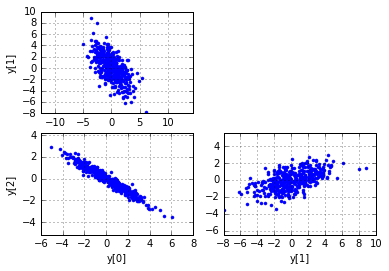

In [2]:
''' This code was taken from: https://github.com/ActiveState/code/tree/master/recipes/Python'''
"""Example of generating correlated normally distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1), num_samples times.
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

# Note: here y[0] and y[2] are plotted where they seem to be negatively correlated in a close to 1 unit manner
subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

## Resources
[This video](https://www.google.com/search?q=generating+correlated+random+variables&oq=generating+correlated+random+variables+&aqs=chrome..69i57j0l5.7677j0j4&sourceid=chrome&ie=UTF-8#kpvalbx=1) has an awesome explanation and further insight to Cholesky decomposition
* Minute 15 has great insight into what L is, roughly, $L \approx \sqrt{C}$